In [5]:
import scipy as sp
import numpy as np
import time

try:
    from localgraphclustering import *
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    from localgraphclustering import * 

import time

## Load data

In [6]:
g = GraphLocal('datasets/JohnsHopkins.graphml','graphml')

## Example on how to find all clusters in graph using local graph clustering

In [7]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
X,Z = compute_all_embeddings_and_distances(g,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6)
end = time.time()
print(end - start)

20.24350595474243


In [8]:
start = time.time()
# Find the clusters
labels = compute_clusters_given_distance(nclusters=4,Z=Z)
end = time.time()
print(end - start)

1.0410048961639404


## Visualize the output

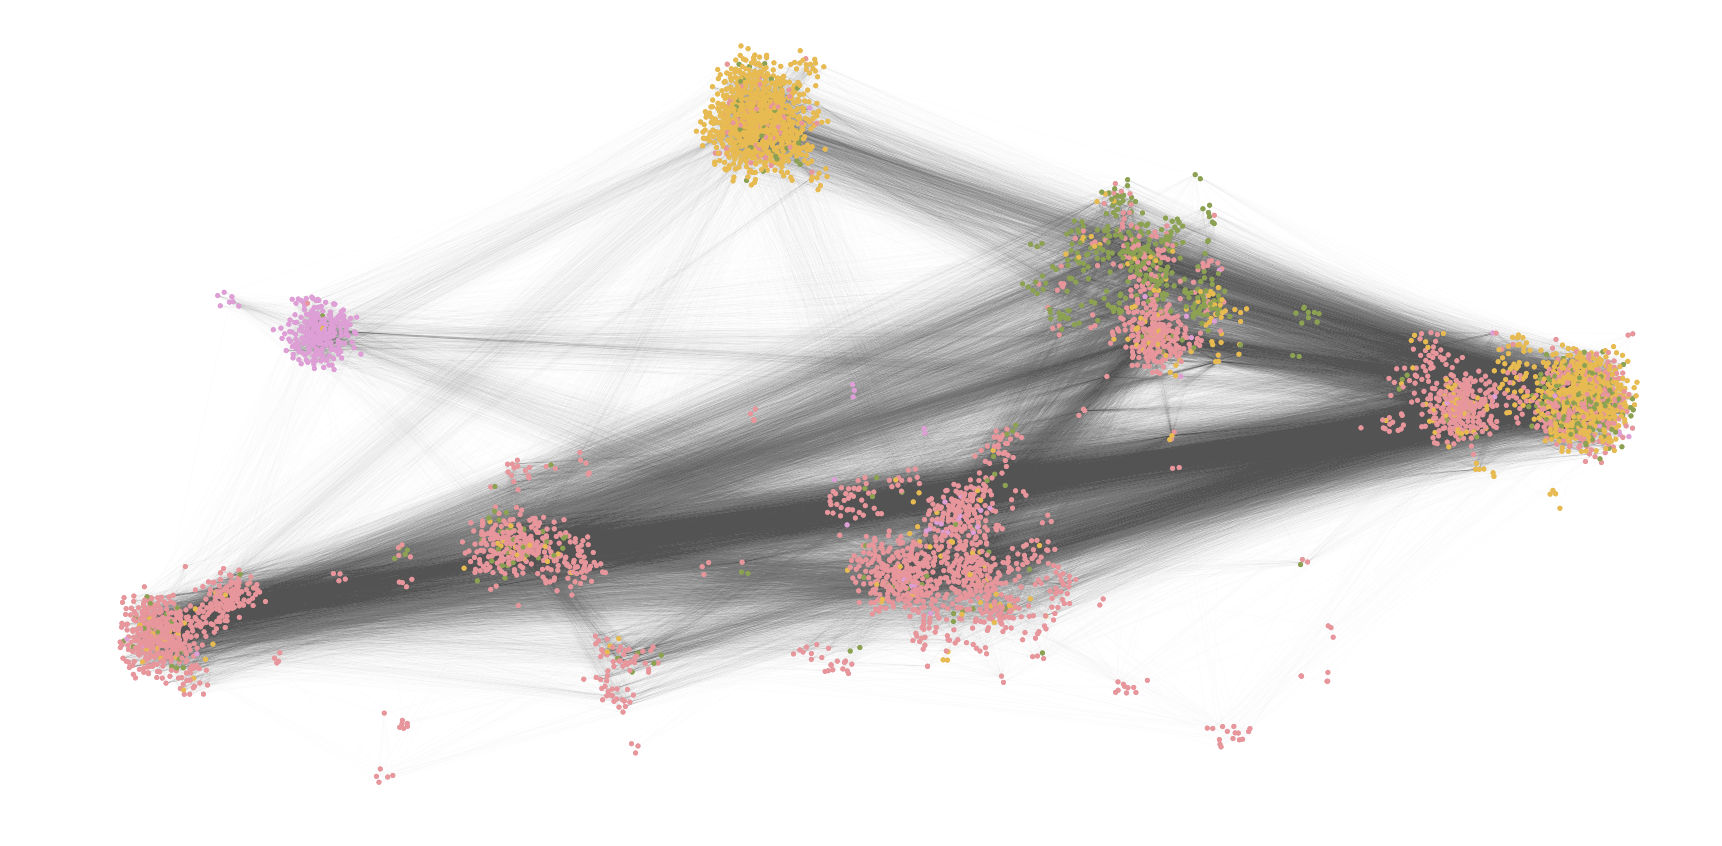

In [10]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

## Another example

In [11]:
# This example computes the embeddings and the clusters in one function. It is not recommended when we want to experiment
# with multiple parameters nclusters. Look at the fist example above for a faster approach.
labels = find_clusters(g,nclusters=4,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6)

## Visualize the output

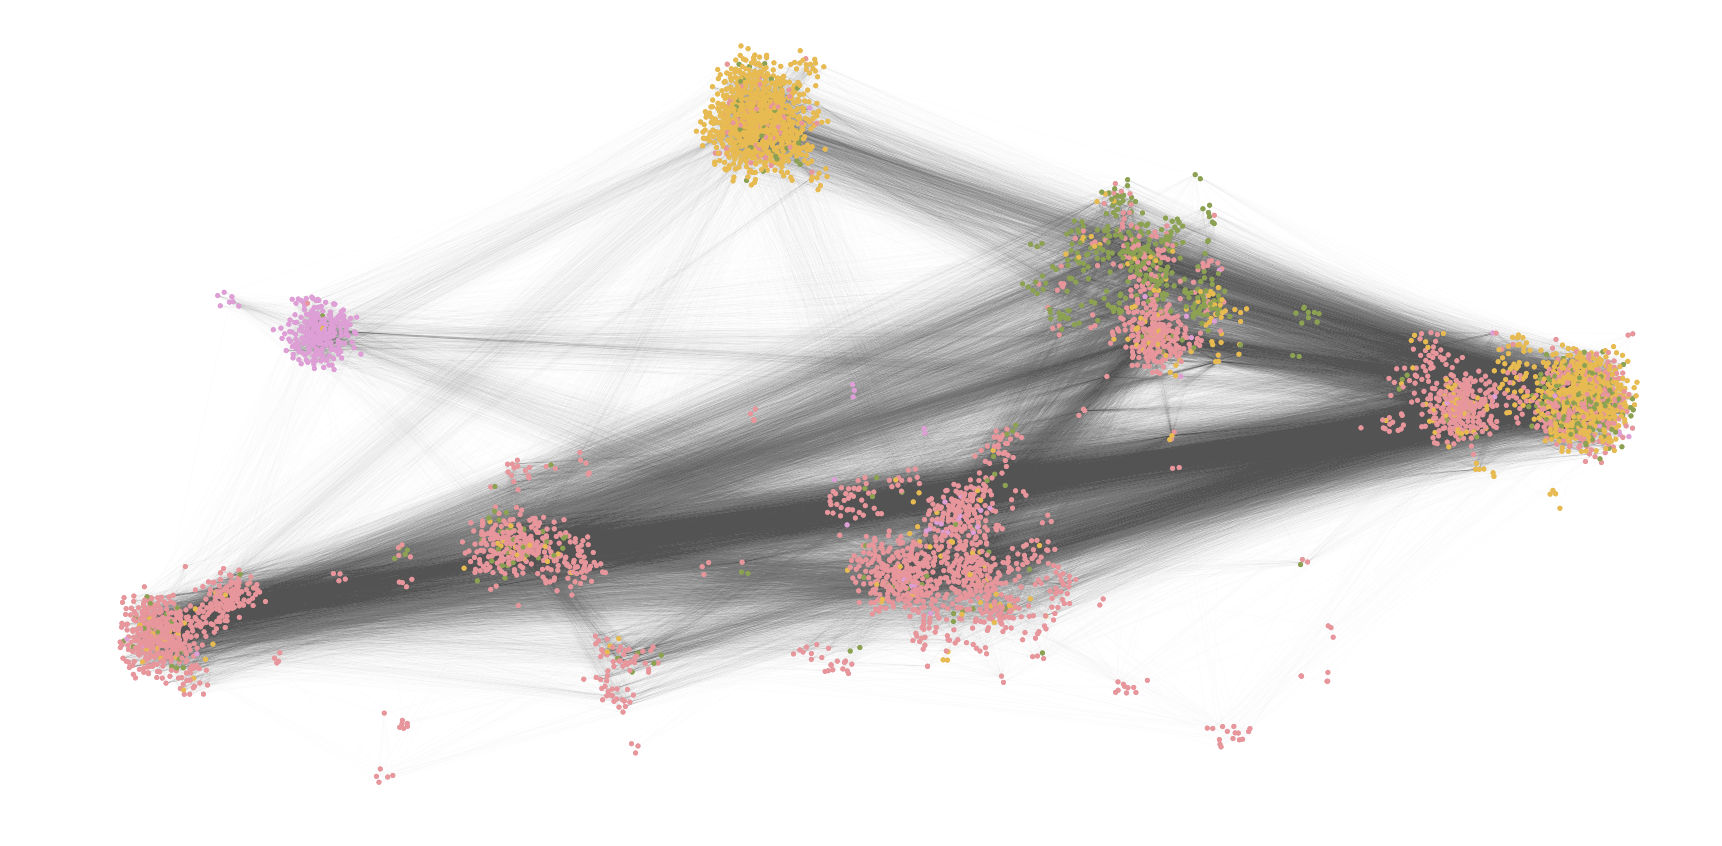

In [12]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

## Segment the graph

In [13]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
labels, info = graph_segmentation(g,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6,ratio=0.1)
end = time.time()
print(end - start)

1.125952959060669ted:  94.72561566802405


In [14]:
X, Z = compute_embeddings_and_distances_from_region_adjacency(g,info,n_jobs=6)

In [15]:
labels = compute_clusters_from_region_adjacency(g,4,Z,info)

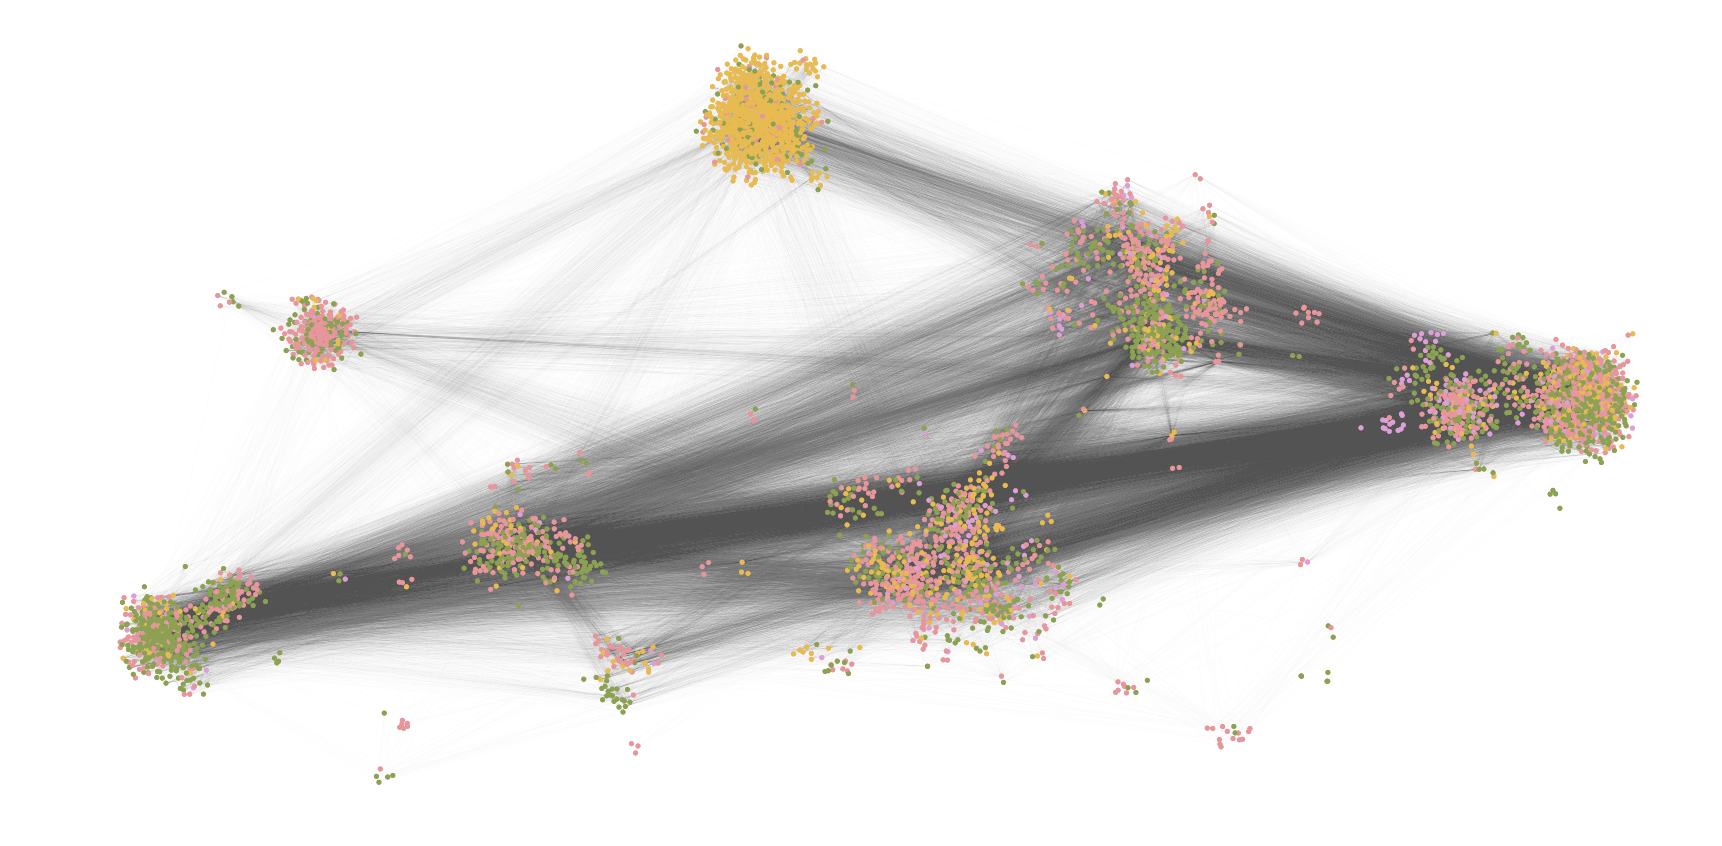

In [16]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)